In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [140]:
mu = 1
sigma = 2
learning_rate = 1e-3
epsilon = 0
epochs = 1000
test_size = 20

In [185]:
train_size = 20
batch_size = train_size
x_train = torch.unsqueeze(torch.from_numpy(np.append(np.random.normal(-mu,sigma,train_size),np.random.normal(mu,sigma,train_size))), dim=1).float()
y_train = torch.unsqueeze(torch.cat([-torch.ones(train_size), torch.ones(train_size)]), dim=1).float()
x_test = torch.unsqueeze(torch.from_numpy(np.append(np.random.normal(-mu,sigma,test_size),np.random.normal(mu,sigma,test_size))), dim=1).float()
y_test = torch.unsqueeze(torch.cat([-torch.ones(test_size), torch.ones(test_size)]), dim=1).float()
train_set = Data.TensorDataset(x_train, y_train)
train_loader = Data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)


ValueError: x and y must be the same size

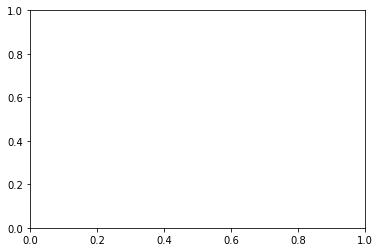

In [186]:
plt.scatter(np.arange(1, 11), x_train)

In [187]:
def linear_loss(output, target):
#     print('output', output.size(), output)
#     print('target', target.size(), target)
    return -output.t() @ target


In [188]:
class WeightClipper(object):
    def __call__(self, module):
        # filter the variables to get the ones you want
        if hasattr(module, 'weight'):
            w = module.weight.data
            module.weight.data = w.clamp(-0.1, 0.1)
#             w.sub_(torch.min(w)).div_(torch.max(w) - torch.min(w))

model = nn.Linear(1, 1, bias=False)
clipper = WeightClipper()
model.apply(clipper)

Linear(in_features=1, out_features=1, bias=False)

In [189]:
# model = nn.Linear(1, 1, bias=False)
# def model(x):
#     return 1 if x*w > 0 else -1

In [190]:
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [191]:
loss_fn = linear_loss
# loss_fn = F.mse_loss

In [192]:
loss = loss_fn(model(x_train), y_train)

In [193]:
loss

tensor([[2.0483]], grad_fn=<MmBackward>)

In [194]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1000]], requires_grad=True)]

In [195]:
model.weight.data

tensor([[-0.1000]])

In [196]:
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for x, y in train_loader:
            opt.zero_grad()
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            
            opt.step()
            model.apply(clipper)

    print('Training loss: ', loss_fn(model(x_train), y_train))
    print('Test loss: ', loss_fn(model(x_test), y_test))

In [197]:
fit(epochs, model, loss_fn, opt)

Training loss:  tensor([[-2.0483]], grad_fn=<MmBackward>)
Test loss:  tensor([[-3.5474]], grad_fn=<MmBackward>)


In [198]:
model(x_test)

tensor([[ 0.0227],
        [-0.0509],
        [-0.0227],
        [ 0.0782],
        [-0.1025],
        [-0.2275],
        [-0.0351],
        [-0.2189],
        [-0.0842],
        [-0.0922],
        [-0.1228],
        [ 0.0385],
        [-0.0701],
        [-0.2783],
        [ 0.2373],
        [-0.2903],
        [ 0.0224],
        [-0.0846],
        [-0.3276],
        [ 0.0516],
        [-0.0083],
        [ 0.1853],
        [ 0.2196],
        [ 0.1547],
        [ 0.3820],
        [-0.1482],
        [-0.0232],
        [ 0.0052],
        [ 0.4032],
        [ 0.4452],
        [ 0.2398],
        [-0.3303],
        [-0.1329],
        [ 0.3108],
        [ 0.0396],
        [-0.1103],
        [ 0.1185],
        [ 0.0689],
        [ 0.0836],
        [ 0.0873]], grad_fn=<MmBackward>)

In [199]:
y_test

tensor([[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.]])

In [200]:
list(model.parameters())

[Parameter containing:
 tensor([[0.1000]], requires_grad=True)]